# Dermoscopy images classification
* This nootebook process the images of Dermoscopy images Dataset.
* Include the py files of the project in google drive  and add them as sys.path.append.
* Include the dataset for mass detection to google drive and load it path as the variable path.
* Use the generated CSV of the project that contains the features of the masses.
* The components to process new images are loaded in this notebook

WARNING!! This colab notebook takes arround 8 hours to complete, most of the time colab logs out, it is highly recommended to run this notebook ofline.

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import sys
sys.path.append('/content/gdrive/My Drive/DERMO')

In [0]:
!pip install mahotas
!pip install pyradiomics 
!pip install SimpleITK 

## Prepare the datasets 


In [0]:
from feature_extraction.training_data import prepate_datasets
path_train = 'gdrive/My Drive/dataset_dermo/train'
prepate_datasets(path_train, "train.csv")

  0%|          | 0/4800 [00:00<?, ?it/s]

Preparing training set!



100%|██████████| 4800/4800 [2:57:43<00:00,  1.84s/it]


In [0]:
from feature_extraction.training_data import prepate_datasets
path_val = 'gdrive/My Drive/dataset_dermo/val'
prepate_datasets(path_val, "val.csv")

  0%|          | 0/1200 [00:00<?, ?it/s]

Preparing training set!



100%|██████████| 1200/1200 [43:22<00:00,  1.89s/it]


## Open the datasets

In [0]:
import pandas as pd
train_data = pd.read_csv('gdrive/My Drive/dataset_dermo/train/train.csv')
val_data = pd.read_csv('gdrive/My Drive/dataset_dermo/val/val.csv')
X_train = train_data.iloc[:, 3:].to_numpy()
Y_train = (train_data.iloc[:, 2] == 'les').to_numpy() * 1
X_val = val_data.iloc[:, 3:].to_numpy()
Y_val = (val_data.iloc[:, 2] == 'les').to_numpy() * 1

## XG Boost CLASSIFIER

In [0]:
import numpy as np
import pandas as pd
import xgboost as xgb

from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, precision_score, recall_score

*   Set the parameters of the XGBoost classifier
*   Calculate the ratio between both classes and assign it to a parameter.





In [0]:
dtrain = xgb.DMatrix(X_train, label=Y_train)
params = {
    'objective':'binary:logistic',
    'max_depth':10,
    'silent':1,
    'eta':1
}
num_rounds = 50
train_labels = dtrain.get_label()
ratio = 0.6
#float(np.sum(train_labels == 0)) / np.sum(train_labels == 1)
params['scale_pos_weight'] = ratio
bst_model = params, num_rounds
print(ratio)

0.6


#### Model Training 

In [0]:
dtrain = xgb.DMatrix(X_train, label=Y_train)
dtest = xgb.DMatrix(X_val)

params, num_rounds = bst_model

bst = xgb.train(params, dtrain, num_rounds)
probability = bst.predict(dtest)

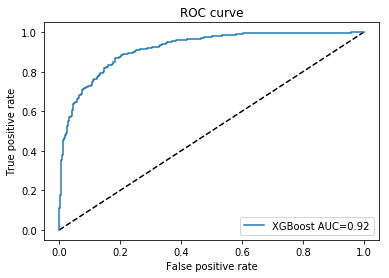

In [0]:
from sklearn.metrics import roc_curve, auc,accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(Y_val, probability)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='XGBoost AUC='+'{0:.2f}'.format(auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [0]:
print(accuracy_score(Y_val, probability>0.5))
confusion_matrix(Y_val, probability>0.5)

0.835


array([[494, 106],
       [ 92, 508]])

In [0]:
a= 498/(498+102)
print(a)

0.83
